# Final Project: Arabic Natural Audio Emotion Classifier

<font color="blue"> Mohamad Aboufoul </font>

# Introduction

### Problem Statement
Relatively few languages have classifiers for the emotions associated with them. Those that do can assist the deaf by giving more meaning to what would otherwise be ambiguous text derived from a speaker. Arabic does not have an established natural audio emotion detector, so this is still a novel problem yet to be solved.

Emotion detectors for natural audio can be used in other applications like voice assistants, which can use the information derived from them to better serve the user depending on his/her mood. They can also be used in automated answering systems, which can help automatically determine the satisfaction of a customer calling a support line.

### Motivation
I'm currently taking a Natural Language Processing course and I was really interested in the various ways that systems were being built to understand human language. I mostly worked with the English language in my projects for that class with some exposure to Romance languages like Spanish, French, and Italian when building a simple language classifier and in machine translation.

As an Arab, I've been fascinated by the Arabic language and wanted to apply my knowledge in Machine Learning, Natural Language Processing, and Arabic to build an emotion classifier once I came across this data set on Kaggle.

### Review of Other Research
The building of emotion detectors is not new, with various researchers having tried various means of solving the problem.

One group of researchers from the Institute for Information Transmission Problems (Kharkevich Institute) designed a study in which they used Recurrent Neural Networks (RNNs) to build such classifiers. They collected their data from the University of Southern California's Interactive Emotional Dyadic Motion Capture (IEMOCAP) Database, which consists of 12 hours of audio from 10 actors. A few people assessed the audio data and classified each given section to one of many listed emotions. However, the researchers here only used 4 gathered from the data set: neutral, anger, sadness, and excitement.

Regarding features used in the data, there are 3 categories:
- **Acoustic:** These contain information from the wave properties of the audio.
- **Prosodic:** These relate to information like pauses in speech and rhythm of spoken words.
- **Linguistic:** These involve the semantics behind words spoken.

The researchers only used the **acoustic** features as the prosodic features varied strongly from person to person. Additionally, the linguistic features were not particularly useful as direct translations for words weren't always available, rendering semantic features useless.

The study can be found here: https://arxiv.org/pdf/1701.08071.pdf

### Open Questions in the Domain
A large number of open questions appear to surround what type of classification model works best for an emotion classifier. Some use neural networks, with different structures from Recurrent Neural Networks (RNNs) to Convolutional Neural Networks (CNNs). Others may use K-Means to cluster unlabeled data. Some use Support Vector Machines (SVMs) in their classification models.

Additionally, factors such as gender have been questioned regarding their importance in building accurate classifiers. Students at Stanford have examined such factors as can be seen here http://cs229.stanford.edu/proj2007/ShahHewlett%20-%20Emotion%20Detection%20from%20Speech.pdf

However, it seems that most emotion classifiers use Mel Frequency Cepstral Coefficients (MFCCs) as important acoustic features in building their models, regardless of what type of model they choose to use.

### Proposed Approach
Given the very high success rate I had using neural networks to build classifiers in the last assignment, I decided to use them again as opposed to scikit-learn's logistic regression classifier. I found the best success in my last assignment using a condensing feed-forward neural network which began with ~double the number of nodes as input features in the first hidden layer and continued with 10 less hidden nodes in each subsequent hidden layer.

The data set used in this project was obtained here https://www.kaggle.com/suso172/arabic-natural-audio-dataset (the normalized csv file was used) and consisted of only acoustic features, much like other researchers used before. The features center around 25 wave properties and are as follows:

- intensity, zero crossing rates, MFCC 1-12 (Mel-frequency cepstral coefficients), F0 (Fundamental frequency) and F0 envelope, probability of voicing and, LSP frequency 0-7

19 statistical functions were applied for all 25 original features as well as delta coefficients, resulting in ~950 features in the original data set. Only the arithmetic of mean of each of the original 25 features was used in this model. Additionally, the mel-frequency cepstral coefficient 9 was missing its arithmetic of mean in the data set, so that value was excluded.

There were 8 audio samples with various speakers in the total data set, with each split into 1 second recordings, resulting in slightly less than 1400 samples. The collectors of the data removed "Silence, laughs and noisy chunks" from each audio file asked 18 listeners to label each as "happy, angry, or surprised".

### Issues and Concerns with Data Set
Although each of the 8 original audio samples were split into 1 second segments, every segment from the same original audio sample was classified to the same emotion by the listeners. I found this a bit odd considering that it's rare when an individual, let along group of individuals, collectively have the same emotion through a series of spoken lines. After listening to the audio samples myself (with my knowledge of Arabic), I found that my suspicions were correct.

Additionally, the emotions happy, angry, and surprised were quite limited to describe the emotional spectrum of the lines spoken in the audio samples. I found more emotions like neutral among others in many of the spoken lines, yet they were still classified under 1 of the 3 emotions that the makers of the data set came up with.

Overall, I believe that there were some issues with the data set itself, but it was the first and only Arabic Natural Audio Data set, so I made due with what was available.

# Data

In [68]:
import csv
import pandas as pd
import os
import numpy as np

pd.set_option('display.max_rows', 10) #Limits number of rows displayed below

#Displays csv file of the features
emotionsExamined = pd.read_csv('ANAD_Normalized.csv')
emotionsExamined = emotionsExamined.sort_values('Type')
emotionsExamined

Emotion   Type  pcm_intensity_sma_amean  pcm_fftMag_mfcc_sma1_amean  \
1382    happy     1                        0                    0.579534   
345     happy     1                        0                    0.408069   
344     happy     1                        0                    0.413308   
343     happy     1                        0                    0.322693   
342     happy     1                        0                    0.433224   
...       ...   ...                      ...                         ...   
829     angry     3                        0                    0.524465   
830     angry     3                        0                    0.385409   
831     angry     3                        1                    0.456979   
859     angry     3                        0                    0.480084   
691     angry     3                        0                    0.435339   

      pcm_fftMag_mfcc_sma2_amean  pcm_fftMag_mfcc_sma3_amean  \
1382                    0.805970                    0.648386   
345                     0.776005                    0.449552   
344                     0.814078                    0.518220   
343                     0.816059                    0.499382   
342                     0.747235                    0.448939   
...                          ...                         ...   
829                     0.605810                    0.393901   
830                     0.792737                    0.464214   
831                     0.648093                    0.411278   
859                     0.613691                    0.391597   
691                     0.709190                    0.468251   

      pcm_fftMag_mfcc_sma4_amean  pcm_fftMag_mfcc_sma5_amean  \
1382                    0.736006                    0.671561   
345                     0.423832                    0.459794   
344                     0.397763                    0.370157   
343                     0.453890                    0.458663   
342                     0.416382                    0.421487   
...                          ...                         ...   
829                     0.716641                    0.611384   
830                     0.411037                    0.433401   
831                     0.383447                    0.342981   
859                     0.459211                    0.391833   
691                     0.387366                    0.306829   

      pcm_fftMag_mfcc_sma6_amean  pcm_fftMag_mfcc_sma7_amean       ...         \
1382                    0.409771                    0.463867       ...          
345                     0.355743                    0.496100       ...          
344                     0.301883                    0.520030       ...          
343                     0.351994                    0.563661       ...          
342                     0.334129                    0.562701       ...          
...                          ...                         ...       ...          
829                     0.487023                    0.636732       ...          
830                     0.289111                    0.598068       ...          
831                     0.325703                    0.571939       ...          
859                     0.287666                    0.501629       ...          
691                     0.353574                    0.627632       ...          

      lspFreq_sma2_amean  lspFreq_sma3_amean  lspFreq_sma4_amean  \
1382            0.638699            0.792472            0.498357   
345             0.519139            0.642443            0.515949   
344             0.501572            0.635959            0.523363   
343             0.597136            0.684828            0.530439   
342             0.484604            0.624623            0.516570   
...                  ...                 ...                 ...   
829             0.681360            0.671832            0.527429   
830             0.549485            0

### Happy Emotion Data
The density plots below represent the features for the 505 happy emotion samples. Most of the distributions were uniform with little variance. The most prominent exception is the LSP frequency 7, which appears to have a bimodal distribution. Some other features had relatively significant skewing like the F0 (fundamental frequency), F0 envelope, and zero crossing rates.

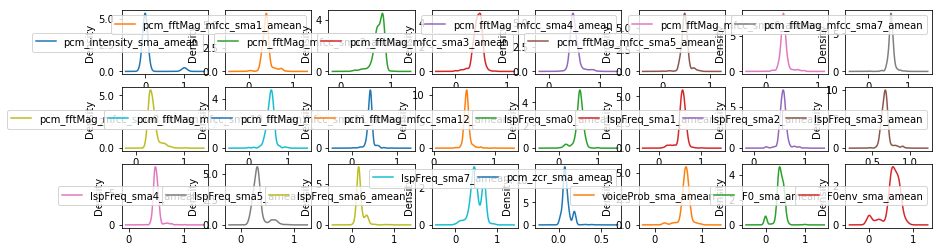

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

happy = emotionsExamined.iloc[:505, 2:] #505 samples of happy natural Arabic audio
happy.plot(kind='density', subplots=True, layout=(3,8), sharex=False)

plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
plt.show()

### Surprised Emotion Data
The density plots below represent the features for the 137 surprised emotion samples. Although the intensity mean values could not be displayed, most features had fairly uniform distributions with little variance. Perhaps the MFCC 10 is the most prominent exception as it appears to have a very large variance.

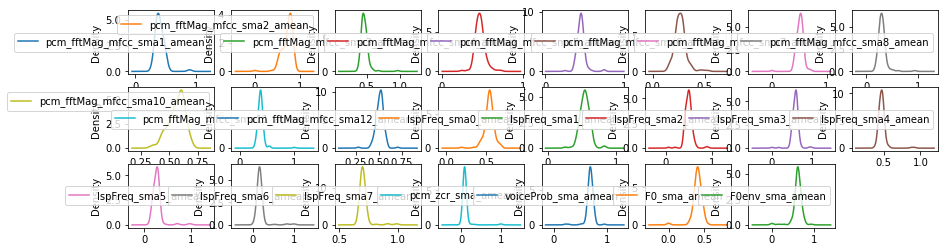

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

surprised = emotionsExamined.iloc[505:642, 3:] #137 samples of natural Arabic audio
surprised.plot(kind='density', subplots=True, layout=(3,8), sharex=False)

plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
plt.show()

### Angry Emotion Data
The density plots below represent the features for the 741 angry emotion samples. Most of the density plots had uniform distributions with little variance. The most prominent aberration is the intensity distribution, which is clearly bimodal. Other than that, even positive and negative skewing appear to be minimal amongst the other features' distributions.

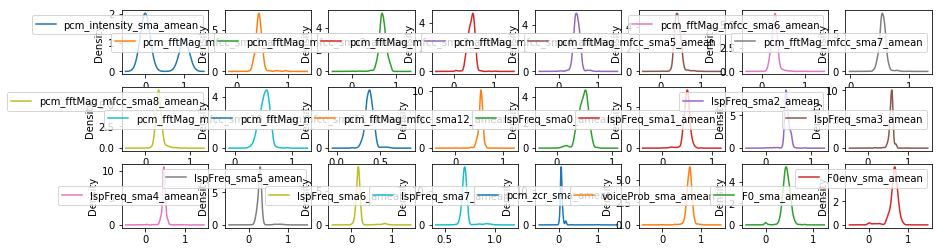

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

angry = emotionsExamined.iloc[642:, 2:] #741 samples of natural Arabic audio
angry.plot(kind='density', subplots=True, layout=(3,8), sharex=False)

plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
plt.show()

# Methods

A feed-forward neural network was used beginning with 60 nodes in the first hidden layer, which is more than twice the number of acoustic features used (24) as nodes in the input layer. For 6 hidden layers, the number of nodes dropped by 10 with each subsequent hidden layer. This resulted in a structure of hidden layers with the number of nodes per hidden layer decreasing as follows: 60 -> 50 -> 40 -> 30 -> 20 -> 10. The contracting deep neural network structure yielded the best results of the feed forward forward networks with which I experimented prior to this assignment, which is why I chose to use it here.

Each hidden layer up through the 5th used a sigmoid activation function. The 6th hidden layer uses a Rectified Linear Unit (ReLU) activation function as it's outputted matrix is multiplied by the output layer in which the class with the highest output value is the predicted class. This combination was useful because using only sigmoid activation might have resulted in a vanishing gradient while the ReLU activation tends to blow it up.

The code below takes the data, shuffles it to a consistent random state, divides it into a training and test set (20%), and converts each y output into a list of size 3 (using an encoder) in which a 1 is placed in the first index if the emotion is angry, in the second index if it is happy, and in the third index if it is surprised. The learning rate is set to 0.05 and the number of epochs to 1000. For each epoch, the mean squared error and accuracy are both calculated for the training set, and the mean squared error and accuracy are finally calculated for the test set.

**<font color="red"> The following code can take anywhere from 5 minutes to 30 minutes to run. The accuracy tends to always be EXTREMELY close to 100%, however. </font>**

In [99]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


def one_hot_encode(labels): #Matrix with 1 in the index corresponding to the proper class
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

def deep_feed_forward(x, weights, biases):
    #Hidden layer 1 with sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']),  biases['b1']) #matrix multiplication, then adding of biases
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer 2 with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),  biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Hidden layer 3 with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),  biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #Hidden layer 4 with sigmoid activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),  biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    #Hidden layer 5 with sigmoid activation
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']),  biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    #Hidden layer 6 with relu activation
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']),  biases['b6'])
    layer_6 = tf.nn.relu(layer_6)
    
    #Output layer with linear activation
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer

In [100]:
data = pd.read_csv('ANAD_Normalized.csv')
X = data[data.columns[1:26]].values
y = data[data.columns[0]]

X = preprocessing.MinMaxScaler().fit_transform(X) #Normalizes X features (scales to range of 0-1)
original_X = X
original_y = y

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y) #[1, 0, 0] for angry; [0, 1, 0] for happy; and [0, 0, 1] for surprised

X, Y = shuffle(X, Y, random_state = 1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state = 415)

learning_rate = 0.05
training_epochs = 1000 #Can probably reduce this to ~600-650 since accuracy becomes 1.0 starting around that point
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X.shape[1] #Number of columns
n_class = 3 #number of classes

#30 features to be used as inputs #DEEP FEED FORWARD CONTRACTING (Getting narrower) NETWORK BELOW
n_hidden_1 = 60 #60 nodes in hidden layer 1
n_hidden_2 = 50
n_hidden_3 = 40
n_hidden_4 = 30
n_hidden_5 = 20
n_hidden_6 = 10

x = tf.placeholder(tf.float32, [None, n_dim]) #Latter input is shape of input; None indicates that as many rows (samples) as you like can be used
W = tf.Variable(tf.zeros([n_dim, n_class])) #Weight matrix
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class]) #outputs; None indicates as many rows (samples) as you like. n_class indicates number of columns (classes)

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])), #Matrix is number of features by number of nodes in hidden layer 1
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class])) #2 classes
}

In [101]:
init = tf.global_variables_initializer()
saver = tf.train.Saver() #saves model

#Call model
y = deep_feed_forward(x, weights, biases)

#Define cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))  #Loss function; logits is output, y_ is target values (already known)
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function) #Gradient descent with learning rate; minimizing loss (cost_function)

sess = tf.Session()
sess.run(init)

#Calculate cost and accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost) #Appends cost
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print('epoch: ', epoch, ' - cost: ', cost, ' - MSE: ', mse_, ' - Train Accuracy: ', accuracy)

epoch:  0  - cost:  2.9647  - MSE:  21.3435207358  - Train Accuracy:  0.536166
epoch:  1  - cost:  1.76655  - MSE:  8.77542161532  - Train Accuracy:  0.536166
epoch:  2  - cost:  1.04392  - MSE:  3.68017246958  - Train Accuracy:  0.536166
epoch:  3  - cost:  0.939603  - MSE:  2.89622592993  - Train Accuracy:  0.541591
epoch:  4  - cost:  0.92033  - MSE:  2.47457274318  - Train Accuracy:  0.537975
epoch:  5  - cost:  0.910753  - MSE:  2.32327971609  - Train Accuracy:  0.5434
epoch:  6  - cost:  0.903681  - MSE:  2.22203935456  - Train Accuracy:  0.544304
epoch:  7  - cost:  0.897379  - MSE:  2.16256619525  - Train Accuracy:  0.546112
epoch:  8  - cost:  0.891441  - MSE:  2.12786616339  - Train Accuracy:  0.54792
epoch:  9  - cost:  0.885684  - MSE:  2.11126877101  - Train Accuracy:  0.550633
epoch:  10  - cost:  0.880016  - MSE:  2.10686239378  - Train Accuracy:  0.552441
epoch:  11  - cost:  0.874383  - MSE:  2.11122330299  - Train Accuracy:  0.553345
epoch:  12  - cost:  0.868751  - M

epoch:  101  - cost:  0.366317  - MSE:  3.61110815178  - Train Accuracy:  0.896926
epoch:  102  - cost:  0.363325  - MSE:  3.8629200939  - Train Accuracy:  0.896926
epoch:  103  - cost:  0.36041  - MSE:  3.66423885185  - Train Accuracy:  0.896926
epoch:  104  - cost:  0.357609  - MSE:  3.85550318417  - Train Accuracy:  0.896926
epoch:  105  - cost:  0.354884  - MSE:  3.70904493309  - Train Accuracy:  0.896926
epoch:  106  - cost:  0.352209  - MSE:  3.85732616451  - Train Accuracy:  0.896926
epoch:  107  - cost:  0.349582  - MSE:  3.75133150265  - Train Accuracy:  0.896926
epoch:  108  - cost:  0.346989  - MSE:  3.86181026911  - Train Accuracy:  0.896926
epoch:  109  - cost:  0.34445  - MSE:  3.79145847045  - Train Accuracy:  0.896926
epoch:  110  - cost:  0.341937  - MSE:  3.87211120171  - Train Accuracy:  0.896926
epoch:  111  - cost:  0.339464  - MSE:  3.82895716747  - Train Accuracy:  0.896022
epoch:  112  - cost:  0.337016  - MSE:  3.88647991612  - Train Accuracy:  0.896022
epoch: 

epoch:  200  - cost:  0.171826  - MSE:  6.7643202702  - Train Accuracy:  0.894213
epoch:  201  - cost:  0.170653  - MSE:  6.80959544451  - Train Accuracy:  0.894213
epoch:  202  - cost:  0.169499  - MSE:  6.86004029438  - Train Accuracy:  0.894213
epoch:  203  - cost:  0.168361  - MSE:  6.93974366173  - Train Accuracy:  0.894213
epoch:  204  - cost:  0.167235  - MSE:  6.97697107332  - Train Accuracy:  0.895118
epoch:  205  - cost:  0.166122  - MSE:  7.04448836771  - Train Accuracy:  0.895118
epoch:  206  - cost:  0.165019  - MSE:  7.08671175221  - Train Accuracy:  0.896022
epoch:  207  - cost:  0.163933  - MSE:  7.15554182256  - Train Accuracy:  0.896022
epoch:  208  - cost:  0.162859  - MSE:  7.19771999086  - Train Accuracy:  0.896926
epoch:  209  - cost:  0.161799  - MSE:  7.26350424767  - Train Accuracy:  0.899638
epoch:  210  - cost:  0.160747  - MSE:  7.30626554209  - Train Accuracy:  0.903255
epoch:  211  - cost:  0.159703  - MSE:  7.35755122391  - Train Accuracy:  0.907776
epoch

epoch:  300  - cost:  0.0985516  - MSE:  12.3002090056  - Train Accuracy:  0.976492
epoch:  301  - cost:  0.0980449  - MSE:  12.3727505447  - Train Accuracy:  0.976492
epoch:  302  - cost:  0.0975407  - MSE:  12.4026598093  - Train Accuracy:  0.976492
epoch:  303  - cost:  0.0970399  - MSE:  12.4761438852  - Train Accuracy:  0.976492
epoch:  304  - cost:  0.0965437  - MSE:  12.5269905597  - Train Accuracy:  0.9783
epoch:  305  - cost:  0.0960516  - MSE:  12.5785472869  - Train Accuracy:  0.9783
epoch:  306  - cost:  0.0955702  - MSE:  12.6720351161  - Train Accuracy:  0.980108
epoch:  307  - cost:  0.0950878  - MSE:  12.6587112941  - Train Accuracy:  0.979204
epoch:  308  - cost:  0.0946016  - MSE:  12.7759425065  - Train Accuracy:  0.980108
epoch:  309  - cost:  0.0941259  - MSE:  12.7826154466  - Train Accuracy:  0.980108
epoch:  310  - cost:  0.0936486  - MSE:  12.8779257993  - Train Accuracy:  0.980108
epoch:  311  - cost:  0.0931797  - MSE:  12.9279311723  - Train Accuracy:  0.980

epoch:  398  - cost:  0.0613446  - MSE:  17.3310064694  - Train Accuracy:  0.994575
epoch:  399  - cost:  0.0610658  - MSE:  17.4089666322  - Train Accuracy:  0.994575
epoch:  400  - cost:  0.0607893  - MSE:  17.4245649183  - Train Accuracy:  0.994575
epoch:  401  - cost:  0.0605161  - MSE:  17.5194991852  - Train Accuracy:  0.994575
epoch:  402  - cost:  0.0602405  - MSE:  17.5197898873  - Train Accuracy:  0.994575
epoch:  403  - cost:  0.0599694  - MSE:  17.6129874337  - Train Accuracy:  0.994575
epoch:  404  - cost:  0.0596981  - MSE:  17.6142402121  - Train Accuracy:  0.994575
epoch:  405  - cost:  0.0594339  - MSE:  17.7237195514  - Train Accuracy:  0.994575
epoch:  406  - cost:  0.0591678  - MSE:  17.6936557587  - Train Accuracy:  0.994575
epoch:  407  - cost:  0.0588989  - MSE:  17.8154958951  - Train Accuracy:  0.994575
epoch:  408  - cost:  0.058638  - MSE:  17.7876459054  - Train Accuracy:  0.994575
epoch:  409  - cost:  0.0583708  - MSE:  17.9089417678  - Train Accuracy:  0.

epoch:  496  - cost:  0.039815  - MSE:  22.1289493705  - Train Accuracy:  0.996383
epoch:  497  - cost:  0.0396394  - MSE:  22.2076233266  - Train Accuracy:  0.996383
epoch:  498  - cost:  0.0394641  - MSE:  22.225703145  - Train Accuracy:  0.996383
epoch:  499  - cost:  0.0392909  - MSE:  22.3040554943  - Train Accuracy:  0.996383
epoch:  500  - cost:  0.0391177  - MSE:  22.3223519153  - Train Accuracy:  0.996383
epoch:  501  - cost:  0.0389462  - MSE:  22.3883515877  - Train Accuracy:  0.996383
epoch:  502  - cost:  0.0387754  - MSE:  22.4278185811  - Train Accuracy:  0.996383
epoch:  503  - cost:  0.0386059  - MSE:  22.4744160313  - Train Accuracy:  0.996383
epoch:  504  - cost:  0.0384374  - MSE:  22.5220441634  - Train Accuracy:  0.996383
epoch:  505  - cost:  0.0382701  - MSE:  22.569781458  - Train Accuracy:  0.996383
epoch:  506  - cost:  0.0381038  - MSE:  22.6177247398  - Train Accuracy:  0.996383
epoch:  507  - cost:  0.0379386  - MSE:  22.6653082811  - Train Accuracy:  0.99

epoch:  594  - cost:  0.0268277  - MSE:  26.5085094328  - Train Accuracy:  0.997288
epoch:  595  - cost:  0.0267295  - MSE:  26.5497408099  - Train Accuracy:  0.997288
epoch:  596  - cost:  0.0266319  - MSE:  26.590786268  - Train Accuracy:  0.997288
epoch:  597  - cost:  0.0265348  - MSE:  26.6318234876  - Train Accuracy:  0.997288
epoch:  598  - cost:  0.0264383  - MSE:  26.6728114289  - Train Accuracy:  0.997288
epoch:  599  - cost:  0.0263423  - MSE:  26.713629423  - Train Accuracy:  0.997288
epoch:  600  - cost:  0.0262467  - MSE:  26.7544295961  - Train Accuracy:  0.997288
epoch:  601  - cost:  0.0261512  - MSE:  26.7942918956  - Train Accuracy:  0.997288
epoch:  602  - cost:  0.0260562  - MSE:  26.8349214152  - Train Accuracy:  0.997288
epoch:  603  - cost:  0.0259617  - MSE:  26.8756628098  - Train Accuracy:  0.998192
epoch:  604  - cost:  0.0258678  - MSE:  26.9164947116  - Train Accuracy:  0.998192
epoch:  605  - cost:  0.0257744  - MSE:  26.9572944513  - Train Accuracy:  0.9

epoch:  692  - cost:  0.0192375  - MSE:  30.2209375482  - Train Accuracy:  0.998192
epoch:  693  - cost:  0.0191781  - MSE:  30.2547483322  - Train Accuracy:  0.998192
epoch:  694  - cost:  0.019119  - MSE:  30.2883087399  - Train Accuracy:  0.998192
epoch:  695  - cost:  0.0190602  - MSE:  30.3218333716  - Train Accuracy:  0.998192
epoch:  696  - cost:  0.0190016  - MSE:  30.3552298243  - Train Accuracy:  0.998192
epoch:  697  - cost:  0.0189433  - MSE:  30.3887050732  - Train Accuracy:  0.998192
epoch:  698  - cost:  0.0188853  - MSE:  30.4221670282  - Train Accuracy:  0.998192
epoch:  699  - cost:  0.0188275  - MSE:  30.4556112683  - Train Accuracy:  0.998192
epoch:  700  - cost:  0.01877  - MSE:  30.4890218627  - Train Accuracy:  0.998192
epoch:  701  - cost:  0.0187128  - MSE:  30.5223752478  - Train Accuracy:  0.998192
epoch:  702  - cost:  0.0186559  - MSE:  30.5556893128  - Train Accuracy:  0.998192
epoch:  703  - cost:  0.0185995  - MSE:  30.5900295143  - Train Accuracy:  0.99

epoch:  790  - cost:  0.0145795  - MSE:  33.1429287895  - Train Accuracy:  0.999096
epoch:  791  - cost:  0.0145412  - MSE:  33.1694434127  - Train Accuracy:  0.999096
epoch:  792  - cost:  0.0145031  - MSE:  33.1959269383  - Train Accuracy:  0.999096
epoch:  793  - cost:  0.014465  - MSE:  33.2223859457  - Train Accuracy:  0.999096
epoch:  794  - cost:  0.0144272  - MSE:  33.2487995804  - Train Accuracy:  0.999096
epoch:  795  - cost:  0.0143894  - MSE:  33.2751914956  - Train Accuracy:  0.999096
epoch:  796  - cost:  0.0143519  - MSE:  33.3022514175  - Train Accuracy:  0.999096
epoch:  797  - cost:  0.0143145  - MSE:  33.3287867597  - Train Accuracy:  0.999096
epoch:  798  - cost:  0.0142772  - MSE:  33.3550007379  - Train Accuracy:  0.999096
epoch:  799  - cost:  0.0142401  - MSE:  33.3811065953  - Train Accuracy:  0.999096
epoch:  800  - cost:  0.0142031  - MSE:  33.4071404646  - Train Accuracy:  0.999096
epoch:  801  - cost:  0.0141663  - MSE:  33.4331346356  - Train Accuracy:  0.

epoch:  888  - cost:  0.0114284  - MSE:  35.5471610961  - Train Accuracy:  0.999096
epoch:  889  - cost:  0.0114016  - MSE:  35.5695861594  - Train Accuracy:  0.999096
epoch:  890  - cost:  0.0113749  - MSE:  35.591990013  - Train Accuracy:  0.999096
epoch:  891  - cost:  0.0113482  - MSE:  35.6143583873  - Train Accuracy:  0.999096
epoch:  892  - cost:  0.0113217  - MSE:  35.6367113963  - Train Accuracy:  0.999096
epoch:  893  - cost:  0.0112953  - MSE:  35.65903875  - Train Accuracy:  0.999096
epoch:  894  - cost:  0.0112689  - MSE:  35.6813413161  - Train Accuracy:  0.999096
epoch:  895  - cost:  0.0112426  - MSE:  35.7036308936  - Train Accuracy:  0.999096
epoch:  896  - cost:  0.0112164  - MSE:  35.7259000164  - Train Accuracy:  0.999096
epoch:  897  - cost:  0.0111903  - MSE:  35.7481463355  - Train Accuracy:  0.999096
epoch:  898  - cost:  0.0111643  - MSE:  35.770256059  - Train Accuracy:  0.999096
epoch:  899  - cost:  0.0111384  - MSE:  35.7924218165  - Train Accuracy:  0.999

epoch:  986  - cost:  0.00918827  - MSE:  37.6377888186  - Train Accuracy:  0.999096
epoch:  987  - cost:  0.00916902  - MSE:  37.6578909634  - Train Accuracy:  0.999096
epoch:  988  - cost:  0.00914982  - MSE:  37.679042442  - Train Accuracy:  0.999096
epoch:  989  - cost:  0.0091307  - MSE:  37.6985238133  - Train Accuracy:  0.999096
epoch:  990  - cost:  0.00911164  - MSE:  37.7192930441  - Train Accuracy:  0.999096
epoch:  991  - cost:  0.00909264  - MSE:  37.7390691478  - Train Accuracy:  0.999096
epoch:  992  - cost:  0.00907371  - MSE:  37.7594089421  - Train Accuracy:  0.999096
epoch:  993  - cost:  0.00905483  - MSE:  37.7787885721  - Train Accuracy:  0.999096
epoch:  994  - cost:  0.00903603  - MSE:  37.7988863943  - Train Accuracy:  0.999096
epoch:  995  - cost:  0.00901728  - MSE:  37.8187915304  - Train Accuracy:  0.999096
epoch:  996  - cost:  0.0089986  - MSE:  37.8385740017  - Train Accuracy:  0.999096
epoch:  997  - cost:  0.00897998  - MSE:  37.8582801665  - Train Acc

# Results and Discussions

As can be seen be seen from the results above, the accuracy of the model on the training set is extremely high after 1000 epochs. In fact, the accuracy reaches 99% around the 350th epoch, and continues inching upward to 99.9096% for the other iterations. This essentially means that only 1 sample was misclassified from the training set. The mean squared error reaches ~37.898 after 1000 epochs, with an immediate dropoff from ~21 to ~2, at first, followed by a slow increase to ~37.898.

This was the case for the most recent run, which took ~20-25 minutes to train. Other times resulted in an accuracy of 100% on the training set.

To measure the accuracy on the test set, the model was used to predict the proper class for each test sample, and the accuracy was measured (the MSE obviously stayed the same as the latest value outputted from the model above). The accuracy was 99.639%, which also translates to 1 misclassified sample out of the 276-277 samples. Additionally, to show how well the final output values for each class were, 10 arbitrary samples from the test set are displayed below. One can see that the indices with the highest values (which correspond to the predicted class) were typically far higher than the others (the key exception being the 4th sample of the 10 samples listed below, which made an incorrect prediction). This means that the model could make decisions with more certainty, instead of chance playing a large role.

In [109]:
samplePredicted_y = sess.run(y, feed_dict={x: test_x[25:35]})
print('sample prediction set: ', samplePredicted_y)
print('actual y values: ', test_y[25:35])

predictedTest_Y = sess.run(y, feed_dict={x: test_x})
actualTest_Y = test_y

correct_prediction = tf.equal(tf.argmax(predictedTest_Y, 1), tf.argmax(actualTest_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy = (sess.run(accuracy, feed_dict={x: test_x, y_: test_y}))
print("Test Accuracy: ", accuracy)

mse = tf.reduce_mean(tf.square(predictedTest_Y - actualTest_Y))
mse = sess.run(mse)
print("Final MSE: ", mse)

sample prediction set:  [[ -1.71247995   8.08302307   1.44345009]
 [ -1.65948069   8.00128269   1.48367691]
 [ 10.95745373  -4.99222994   6.01052427]
 [  4.17484617  -1.53413272   5.25442076]
 [ 12.76096058  -5.46402359   5.76121092]
 [ -1.6984967    8.10340691   1.35315979]
 [ 11.68529797  -5.17628622   5.83519554]
 [  0.95031726  -0.48255661   4.83626795]
 [ 11.74222183  -5.19859743   5.88017654]
 [ 11.18157482  -4.99640179   5.96184444]]
actual y values:  [[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]
Test Accuracy:  0.99639
Final MSE:  37.8975733111


Below one can see the graphs for the MSE and the accuracy over 1000 epochs. The MSE dropped immediately after the 1st epoch and slowly rose to ~37.9. The accuracy of the model reached ~90% within 100 epochs and ~99% within 350 epochs, slowly rising even higher over the remaining epochs.

MSE history


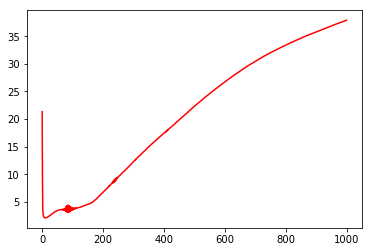

Accuracy over epochs


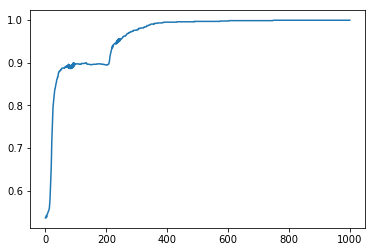

Test accuracy:  0.99639
MSE: 37.8976


In [110]:
#Plot mse and accuracy graph
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

#Print the final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

sess.close()

The implications of the results include the effectiveness of using a contracting deep feed-forward neural network. Additionally, it implies that the acoustic features were really significant in accurately determining which class a given sample belonged to. Overall, the classifier worked extremely well in classifying the given data. Again, I am concerned with how the original data was labeled, particularly because I think the 3 emotions used didn't describe all of the audio samples that well and because I believe many shouldn't have been given any of the 3 possible emotions but rather others like "neutral". However, I do think that an effective classifier could be built with more data and classes using the same acoustic features.

# Conclusions

This final project was very interesting in that it allowed me to apply what I had learned this semester from machine learning and natural language processing to build an intelligent system relevant to my interests in Arabic. I learned that deep neural networks can be very effective in classifying emotion from audio samples AND that acoustic features can suffice in building extremely accurate models. I personally was surprised at how well the model performed and the fact that it consistently performed so well.

Overall, I like the open-ended approach this project allowed us to pursue. It was a great and informative way to evaluate our knowledge of the material and assured me that I had a proper understanding of it.

# References

- Source of data set: https://www.kaggle.com/suso172/arabic-natural-audio-dataset
- Previous study of emotion classification from audio samples: https://arxiv.org/pdf/1701.08071.pdf
- Stanford students' approach to solving the problem that use unique features like gender of speaker: http://cs229.stanford.edu/proj2007/ShahHewlett%20-%20Emotion%20Detection%20from%20Speech.pdf